### sql_to_csv

In [147]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
def str_time(x):
    "x :string in '-seperated date followed by space followed by : seperated time. eg: 'yyyy-MM-d hh:m:ss'. Note: seperator is important but not size of field. In eg, d is not a typo dd."
    y = x.split(' ')
    y[0] = y[0].split('-')
    y[1] = y[1].split(':')
#    print(y)
    return datetime.datetime(int(y[0][0]),int(y[0][1]),int(y[0][2]),int(y[1][0]),int(y[1][1]),int(y[1][2]))

In [199]:
'''def s():
                temp_file_path = header[0].replace(' `','').replace('`','')
            if not os.path.exists(temp_file_path):
                temp_file = open(temp_file_path,'w')
                temp_file.write(header[1].replace(' `','').replace('`','').replace(')',''))
            else:
                print("File already exists : ",temp_file_path)
'''
def sql_to_csv(file_path,fol='./'):
    
    f = open(file_path,'r')
    x = f.read().split('INSERT INTO')
    database = dict()
    missed = list()
    for table in x:
        data =  table.split('VALUES')
        header = data[0].split(' (`')
        if len(header) == 2:
            temp_file_path = header[0].replace(' `','').replace('`','')
            if not temp_file_path in database:
                database[temp_file_path] = [header[1].replace(' `','').replace('`','').replace(')','')]
                #database[temp_file_path].append(header[1])
                #else:
            database[temp_file_path].append(data[1].replace('(','').replace('),','').replace("'",''))
        else:
            missed.append(header)
    for tbl in database:
        if os.path.exists(fol+tbl):
            print("FileExists :",fol+tbl)
        else:
            f = open(fol+tbl,'w')
            f.write(database[tbl][0])
            f.write(database[tbl][1].split(');')[0])
            f.close()
    return missed
#x = 
sql_to_csv('id11084473_iot.sql','temp/')
#y = x[0]['finish'][1].split(';')
#print(x[0]['finish'][1][0],y[0])

[['-- phpMyAdmin SQL Dump\n-- version 4.9.5\n-- https://www.phpmyadmin.net/\n--\n-- Host: localhost:3306\n-- Generation Time: Apr 03, 2020 at 06:39 AM\n-- Server version: 10.3.16-MariaDB\n-- PHP Version: 7.3.12\n\nSET SQL_MODE = "NO_AUTO_VALUE_ON_ZERO";\nSET AUTOCOMMIT = 0;\nSTART TRANSACTION;\nSET time_zone = "+00:00";\n\n\n/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;\n/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;\n/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;\n/*!40101 SET NAMES utf8mb4 */;\n\n--\n-- Database: `id11084473_iot`\n--\n\n-- --------------------------------------------------------\n\n--\n-- Table structure for table `finish`\n--\n\nCREATE TABLE `finish` (\n  `id` int(11) NOT NULL,\n  `at` timestamp NOT NULL DEFAULT current_timestamp(),\n  `value` int(11) NOT NULL,\n  `module_at` int(11) NOT NULL,\n  `ip` varchar(16) COLLATE utf8_unicode_ci NOT NULL,\n  `user` int(11) NOT NULL,\n  `cash_bytes` text COLLATE utf8

In [171]:
!mkdir temp

In [194]:
!ls temp

In [198]:
!rm temp/*

In [200]:
sensor_values = pd.read_csv('temp/sensor_values')
sensor_values

,ip,id,value,at,module_at,user
0,192.168.43.249,1,0,2019-12-26 17:46:52,602218,3
1,192.168.43.249,1,1,2019-12-26 18:11:08,104011,3
2,192.168.43.249,1,185,2019-12-26 18:11:14,110596,-1
3,192.168.43.249,1,0,2019-12-26 18:11:51,147464,3
4,192.168.43.249,1,1,2019-12-26 18:24:43,319453,39
...,...,...,...,...,...,...
245,192.168.43.24,1,3496,2020-03-20 18:20:47,242485,8
246,192.168.43.249,1,62,2020-03-21 07:04:06,164551,3
247,192.168.43.249,1,0,2020-03-21 07:04:26,184971,3
248,192.168.43.249,1,2,2020-03-21 07:09:05,463351,3


,ip,id,value,at,module_at,user
192.168.43.249,1,0,2019-12-26 17:46:52,602218,3,NaN
192.168.43.249,1,1,2019-12-26 18:11:08,104011,3,NaN
192.168.43.249,1,185,2019-12-26 18:11:14,110596,-1,NaN
192.168.43.249,1,0,2019-12-26 18:11:51,147464,3,NaN
192.168.43.249,1,1,2019-12-26 18:24:43,319453,39,NaN
...,...,...,...,...,...,...
192.168.43.24,1,3496,2020-03-20 18:20:47,242485,8,NaN
192.168.43.249,1,62,2020-03-21 07:04:06,164551,3,NaN
192.168.43.249,1,0,2020-03-21 07:04:26,184971,3,NaN
192.168.43.249,1,2,2020-03-21 07:09:05,463351,3,NaN


In [2]:
df = pd.read_sql('id11084473_iot.sql')

TypeError: read_sql() missing 1 required positional argument: 'con'

In [ ]:
pd.read_sql

In [116]:
df =pd.read_csv('sensor_values.csv')#,header=['ip', 'id', 'value', 'at', 'module_at', 'user'])
li = list()
values = list()
for _,row in df[['value','at']].iterrows():
    li.append(str_time(row['at']).timestamp())
    values.append(int(row['value']))
df['timestamp'] = pd.Series(li)
df['value_int'] = pd.Series(values)
df

In [130]:
x = df.iloc[210:230]

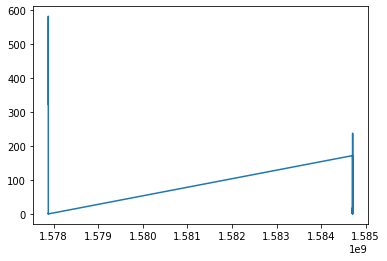

In [131]:
plt.plot(x['timestamp'],x['value'])

In [124]:
df.index

RangeIndex(start=0, stop=250, step=1)

In [8]:
"`ip`, `id`, `value`, `at`, `module_at`, `user`".replace('`',"")

'ip, id, value, at, module_at, user'

In [12]:
df.keys()

Index(['ip', ' id', ' value', ' at', ' module_at', ' user'], dtype='object')

In [25]:
x = df['at'][0]
print(type(x))
x

<class 'str'>


'2019-12-26 17:46:52'

In [60]:
z = datetime.datetime(2000,1,1,1,1,1)
z

datetime.datetime(2000, 1, 1, 1, 1, 1)

In [56]:
y = str_time(x)

In [61]:
datetime.timedelta(z,y)


TypeError: unsupported type for timedelta seconds component: datetime.datetime

In [75]:

str_time(df['at'][5]).timestamp() - str_time(df['at'][1]).timestamp()

823.0

In [83]:
df['timestamp'] = df['at']

In [113]:
df

,ip,id,value,at,module_at,user,timestamp,value_int
0,192.168.43.249,1,0,2019-12-26 17:46:52,602218,3,1.577363e+09,0
1,192.168.43.249,1,1,2019-12-26 18:11:08,104011,3,1.577364e+09,1
2,192.168.43.249,1,185,2019-12-26 18:11:14,110596,-1,1.577364e+09,185
3,192.168.43.249,1,0,2019-12-26 18:11:51,147464,3,1.577364e+09,0
4,192.168.43.249,1,1,2019-12-26 18:24:43,319453,39,1.577365e+09,1
...,...,...,...,...,...,...,...,...
245,192.168.43.24,1,3496,2020-03-20 18:20:47,242485,8,1.584709e+09,3496
246,192.168.43.249,1,62,2020-03-21 07:04:06,164551,3,1.584754e+09,62
247,192.168.43.249,1,0,2020-03-21 07:04:26,184971,3,1.584754e+09,0
248,192.168.43.249,1,2,2020-03-21 07:09:05,463351,3,1.584755e+09,2


In [105]:
for _,row  in df.head().iterrows():
    print(row['ip'])

192.168.43.249
192.168.43.249
192.168.43.249
192.168.43.249
192.168.43.249


In [100]:
s = pd.Series({'a':[2,3]})

In [102]:
s['a']

[2, 3]